In [78]:
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
import seaborn as sb
import nltk
import string

df = pd.read_csv('g:\Dataset\ML Dataset\SMS Spam detection\spam.csv', encoding='latin1')
df.head(2)

<>:8: SyntaxWarning: invalid escape sequence '\D'
<>:8: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ACER\AppData\Local\Temp\ipykernel_14868\3105873675.py:8: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('g:\Dataset\ML Dataset\SMS Spam detection\spam.csv', encoding='latin1')


,v1,v2
0,not_spam,"Go until jurong point, crazy.. Available only ..."
1,not_spam,Ok lar... Joking wif u oni...


In [79]:
df.shape

(5572, 2)

In [80]:
# Data Cleaning
#EDA
#Text Processing
# Model Building

# 1 Data Cleaning

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [82]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [83]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit_transform(df['target'])
df['target']= encoder.fit_transform(df['target'])

In [84]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [85]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [86]:
df.duplicated().sum()

np.int64(403)

In [87]:
df= df.drop_duplicates(keep='first')

In [88]:
df.duplicated().sum()

np.int64(0)

In [89]:
df.shape

(5169, 2)

# 2.EDA

In [90]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

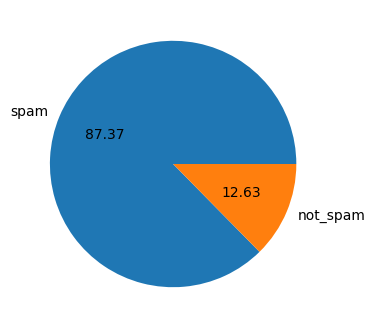

In [91]:
plt.figure(figsize=(4,4))
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['spam', 'not_spam'], autopct='%0.2f')
plt.show()

In [92]:
import nltk

In [93]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [94]:
df["num_of_char"] = df["text"].apply(len) # looking for number of charaters in every message

In [95]:
df.head(2)

,target,text,num_of_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29


In [96]:
df["num_of_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [97]:
df.head(2)

,target,text,num_of_char,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8


In [98]:
df["num_of_sent"] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [99]:
df.head(2)

,target,text,num_of_char,num_of_words,num_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [100]:
df[["num_of_char", "num_of_words", "num_of_sent"]].describe()

,num_of_char,num_of_words,num_of_sent
count,5169.000000,5169.000000,5169.000000
mean,79.003095,18.455794,1.965564
std,58.250882,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [101]:
# Not-Spam messages
df[df["target"] == 0][["num_of_char", "num_of_words", "num_of_sent"]].describe()

,num_of_char,num_of_words,num_of_sent
count,4516.000000,4516.000000,4516.000000
mean,70.483614,17.123782,1.820195
std,56.373230,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [102]:
# Spam messages
df[df['target'] == 1][["num_of_char", "num_of_words", "num_of_sent"]].describe()

,num_of_char,num_of_words,num_of_sent
count,653.000000,653.000000,653.000000
mean,137.921899,27.667688,2.970904
std,30.154383,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


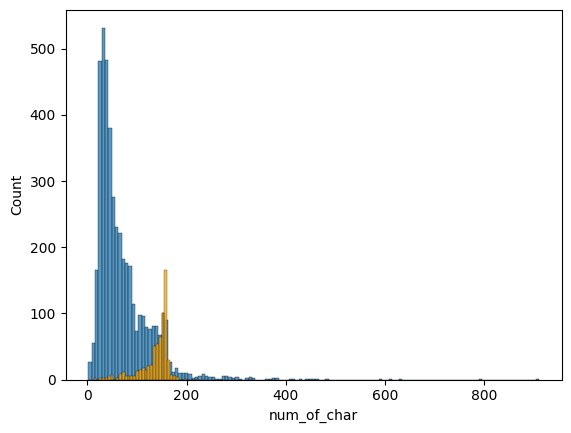

In [103]:
sb.histplot(df[df["target"] == 0]['num_of_char'])
sb.histplot(df[df["target"] == 1]['num_of_char'], color= 'orange');

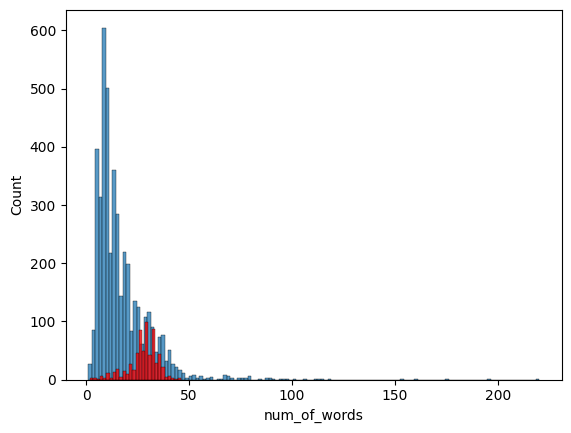

In [104]:
sb.histplot(df[df["target"] == 0]['num_of_words'])
sb.histplot(df[df["target"] == 1]['num_of_words'], color= 'red');

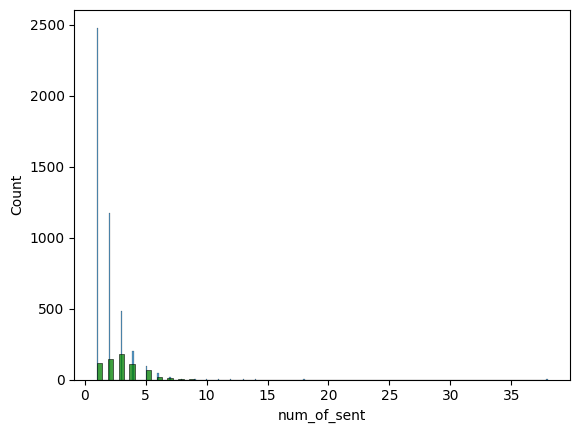

In [105]:
sb.histplot(df[df["target"] == 0]['num_of_sent'])
sb.histplot(df[df["target"] == 1]['num_of_sent'], color= 'green');

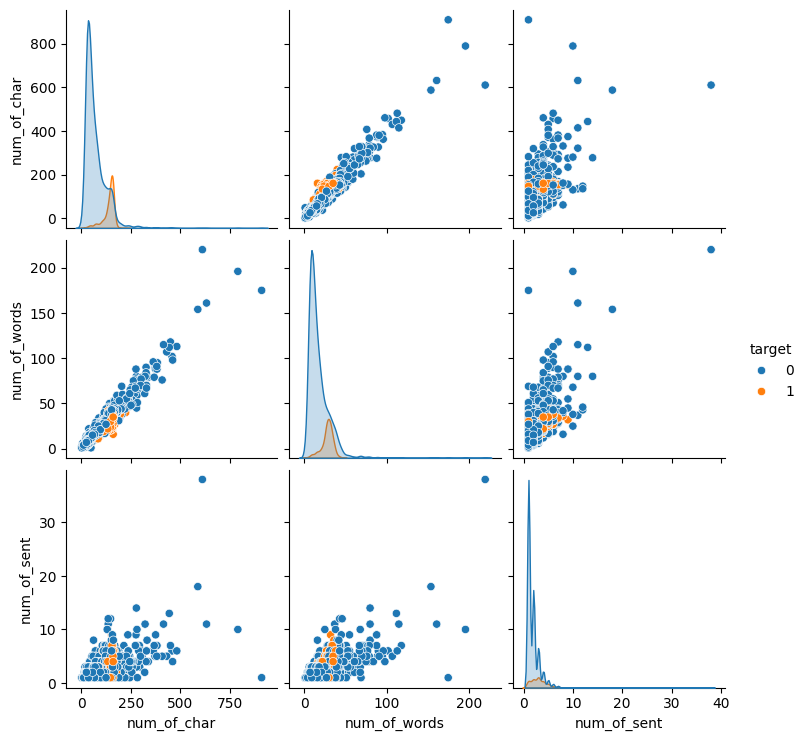

In [106]:
sb.pairplot(df, hue="target");

<Axes: >

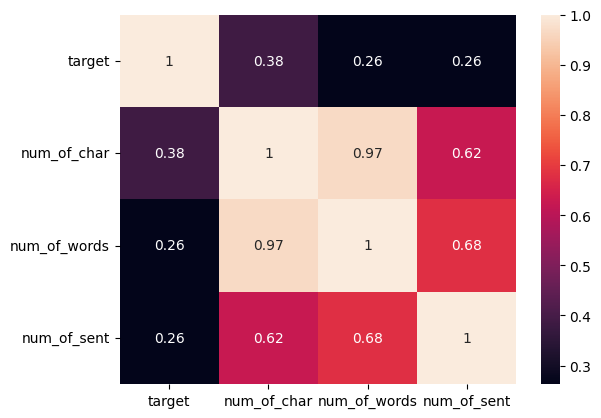

In [107]:
sb.heatmap(df.corr(numeric_only= True), annot= True)

# Data Preprocessing
1. Lower case
2. Tokenization
3. Removing stop words & puntchuation
4. Stemming

In [108]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [109]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english')  and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))



    return " ".join(y)

In [110]:
df['transformed_text'] = df['text'].apply(transform_text)

In [111]:
df.head(2)

,target,text,num_of_char,num_of_words,num_of_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


In [112]:
Word_count_spam = []

In [113]:
for m in  df[df['target'] == 1]['transformed_text'].tolist():
    for w in m.split():
        Word_count_spam.append(w)

In [114]:
from collections import Counter

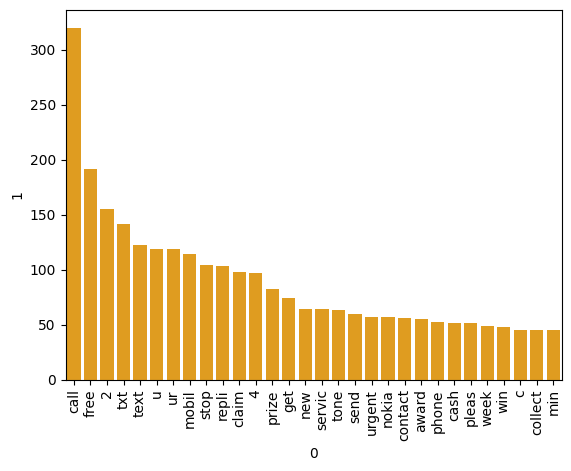

In [115]:
sb.barplot(
    x = pd.DataFrame(Counter(Word_count_spam).most_common(30))[0],
    y = pd.DataFrame(Counter(Word_count_spam).most_common(30))[1],
    color= 'orange')
plt.xticks(rotation = 'vertical');

In [116]:
Word_count_not_spam = []
for m in  df[df['target'] == 0]['transformed_text'].tolist():
    for w in m.split():
        Word_count_not_spam.append(w)

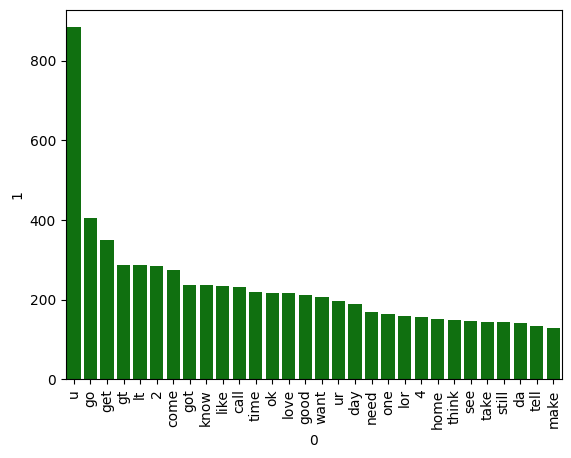

In [117]:
sb.barplot(
    x = pd.DataFrame(Counter(Word_count_not_spam).most_common(30))[0],
    y = pd.DataFrame(Counter(Word_count_not_spam).most_common(30))[1],
    color= 'green')
plt.xticks(rotation = 'vertical');

# Model Building

In [118]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
Tfidf = TfidfVectorizer(max_features=3000)

In [119]:
x = cv.fit_transform(df['transformed_text']).toarray()

In [120]:
x_n = Tfidf.fit_transform(df['transformed_text']).toarray()

In [121]:
x.shape

(5169, 6694)

In [122]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [123]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_n, y, test_size= 0.2, random_state= 42)

In [124]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
bnb = BernoulliNB()
mnb = MultinomialNB()
gnb = GaussianNB()

In [125]:
bnb.fit(x_train, y_train)
y_pred1 = bnb.predict(x_test)
print(confusion_matrix(y_test, y_pred1))
print(accuracy_score(y_test, y_pred1) * 100)
print(precision_score(y_test, y_pred1) * 100)

[[885   4]
 [ 23 122]]
97.38878143133462
96.82539682539682


In [126]:
gnb.fit(x_train, y_train)
y_pred2 = gnb.predict(x_test)
print(confusion_matrix(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2) * 100)
print(precision_score(y_test, y_pred2) * 100)

[[769 120]
 [ 24 121]]
86.073500967118
50.20746887966805


In [127]:
mnb.fit(x_train, y_train)
y_pred3 = mnb.predict(x_test)
print(confusion_matrix(y_test, y_pred1))
print(accuracy_score(y_test, y_pred3) * 100)
print(precision_score(y_test, y_pred3) * 100)

[[885   4]
 [ 23 122]]
97.29206963249516
99.15966386554622


In [128]:
# we have choosen Tfidfvectorizer, and mnb


In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [130]:
log = LogisticRegression(solver= 'liblinear', penalty= 'l1')
svc = SVC(kernel= 'sigmoid' )
Mnb = MultinomialNB()
dt = DecisionTreeClassifier(max_depth= 10)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators= 50, random_state= 42)
adbc = AdaBoostClassifier(n_estimators= 50, random_state= 42)
bgc =BaggingClassifier(n_estimators= 50, random_state= 42)

In [131]:
clf_dict = {
    'LOG' : log,
    'SVC' : svc,
    "MNB" : Mnb,
    "DT" : dt,
    'KNN' : knn,
    'RFC' : rfc,
    "ADbc" :adbc,
    "BGC" :bgc

}

In [132]:
def train_class(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [133]:
train_class(svc, x_train, y_train, x_test, y_test)

(0.9758220502901354, 0.9477611940298507)

In [134]:
acc_scores = []
prec_scores = []

for name,model in clf_dict.items():
    current_acc, current_prec = train_class(model,x_train, y_train, x_test, y_test)

    print('for', name)
    print('accuracy', current_acc)
    print('precision', current_prec)
    
    acc_scores.append(current_acc)
    prec_scores.append(current_prec)

for LOG
accuracy 0.9477756286266924
precision 0.8699186991869918
for SVC
accuracy 0.9758220502901354
precision 0.9477611940298507
for MNB
accuracy 0.9729206963249516
precision 0.9915966386554622
for DT
accuracy 0.9477756286266924
precision 0.8473282442748091
for KNN
accuracy 0.9158607350096711
precision 1.0
for RFC
accuracy 0.971953578336557
precision 0.9915254237288136
for ADbc
accuracy 0.9148936170212766
precision 0.8
for BGC
accuracy 0.9661508704061895
precision 0.8928571428571429


In [135]:
performance_df = pd.DataFrame({"Algos":clf_dict.keys(), "Accuracy": acc_scores ,"precision":prec_scores})

In [136]:
performance_df.sort_values(by = "precision", ascending= False)

,Algos,Accuracy,precision
4,KNN,0.915861,1.000000
2,MNB,0.972921,0.991597
5,RFC,0.971954,0.991525
1,SVC,0.975822,0.947761
7,BGC,0.966151,0.892857
0,LOG,0.947776,0.869919
3,DT,0.947776,0.847328
6,ADbc,0.914894,0.800000


In [137]:
Temp_performance_df = pd.DataFrame({"Algos":clf_dict.keys(), "Accuracy_3000": acc_scores ,"precision_3000":prec_scores})

In [138]:
merged_df = pd.merge(performance_df, Temp_performance_df, on="Algos")
merged_df

,Algos,Accuracy,precision,Accuracy_3000,precision_3000
0,LOG,0.947776,0.869919,0.947776,0.869919
1,SVC,0.975822,0.947761,0.975822,0.947761
2,MNB,0.972921,0.991597,0.972921,0.991597
3,DT,0.947776,0.847328,0.947776,0.847328
4,KNN,0.915861,1.000000,0.915861,1.000000
5,RFC,0.971954,0.991525,0.971954,0.991525
6,ADbc,0.914894,0.800000,0.914894,0.800000
7,BGC,0.966151,0.892857,0.966151,0.892857


In [139]:
# Choosing algos who have precision score more than 95%
# voting classifire
mnb1 = MultinomialNB()
knn1 =KNeighborsClassifier()
rfc1 =RandomForestClassifier(n_estimators= 50, random_state= 42)
from sklearn.ensemble import VotingClassifier

In [140]:
voting = VotingClassifier(estimators=[('mnb', mnb1), ('knn', knn1), ('rfc', rfc1)], voting='soft')

In [141]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('mnb', MultinomialNB()),
                             ('knn', KNeighborsClassifier()),
                             ('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=42))],
                 voting='soft')

In [142]:
y_pred2 = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test, y_pred2))
print("precision", precision_score(y_test, y_pred2))

Accuracy 0.9661508704061895
precision 1.0


In [143]:
import pickle
pickle.dump(Tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))